Eyes Open Image:


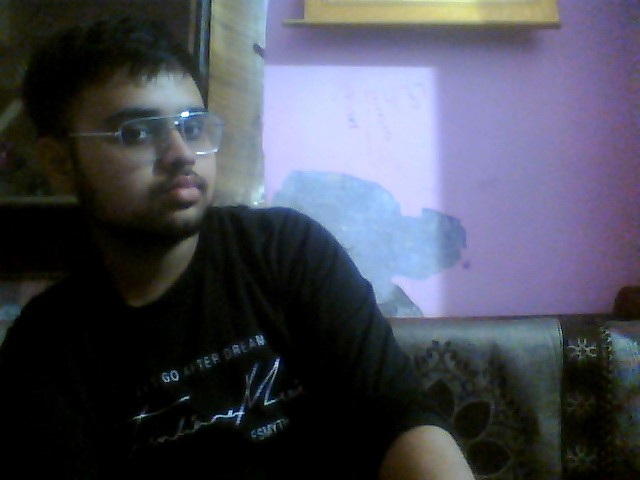

Eyes Closed Image:


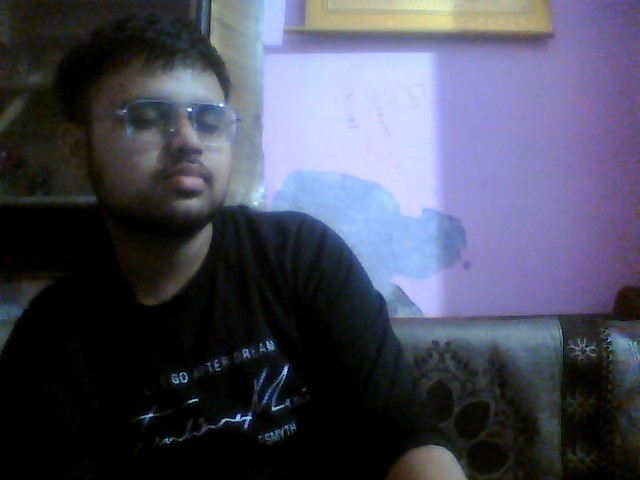

No face detected.
The face might be spoofed (no liveness detected).


In [ ]:
# Google Colab setup
!pip install opencv-python
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_face(frame, face_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

def check_liveness(eyes_open_frame, eyes_closed_frame, face_cascade):
    # Convert images to grayscale
    gray_open = cv2.cvtColor(eyes_open_frame, cv2.COLOR_BGR2GRAY)
    gray_closed = cv2.cvtColor(eyes_closed_frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces_open = face_cascade.detectMultiScale(gray_open, 1.1, 4)
    faces_closed = face_cascade.detectMultiScale(gray_closed, 1.1, 4)

    # Compare the number of faces detected in both frames
    if len(faces_open) == len(faces_closed) and len(faces_open) > 0:
        # If the face is detected in both frames, it's a live face (blinking)
        return True
    return False

def main():
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the two images (eyes open and eyes closed)
    eyes_open_frame = cv2.imread('/content/WIN_20240826_14_08_08_Pro.jpg')
    eyes_closed_frame = cv2.imread('/content/WIN_20240826_14_08_11_Pro.jpg')

    # Show the original images
    print("Eyes Open Image:")
    cv2_imshow(eyes_open_frame)
    print("Eyes Closed Image:")
    cv2_imshow(eyes_closed_frame)

    # Detect faces
    faces = detect_face(eyes_open_frame, face_cascade)

    if len(faces) == 0:
        print("No face detected.")
    else:
        print(f"Detected {len(faces)} face(s).")

    # Check liveness (basic blink detection)
    is_real = check_liveness(eyes_open_frame, eyes_closed_frame, face_cascade)

    if is_real:
        print("The face is real (liveness detected).")
    else:
        print("The face might be spoofed (no liveness detected).")

if __name__ == "__main__":
    main()


# it is code for model that detect the face is real or not basis on image provided
below code ot above-----

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image with Face Marked and Classified:


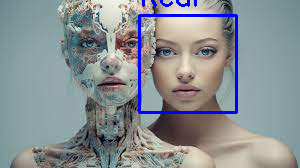

In [ ]:
# Google Colab setup
!pip install tensorflow opencv-python
!pip install opencv-python-headless

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
output = tf.keras.layers.Dense(1, activation='sigmoid')(model.output)
model = tf.keras.models.Model(inputs=model.input, outputs=output)

# Function to detect and mark faces
def detect_and_mark_face(frame, face_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return frame, faces

# Function to preprocess face for model input
def preprocess_face(face):
    face = cv2.resize(face, (224, 224))
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    return face

# Function to classify face as real or fake
def classify_face(face, model):
    face = preprocess_face(face)
    prediction = model.predict(face)[0][0]
    return "Real" if prediction > 0.5 else "Fake"

def main():
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the input image
    frame = cv2.imread('/content/download.jpg')

    # Detect and mark faces
    frame_marked, faces = detect_and_mark_face(frame, face_cascade)

    if len(faces) == 0:
        print("No face detected.")
    else:
        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            classification = classify_face(face, model)
            cv2.putText(frame_marked, classification, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        print("Image with Face Marked and Classified:")
        cv2_imshow(frame_marked)

if __name__ == "__main__":
    main()


## model 2


Image with Face Marked and Classified:


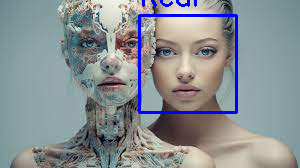

In [ ]:
# Google Colab setup
!pip install tensorflow opencv-python scikit-image

import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab.patches import cv2_imshow

# Function to detect and mark faces
def detect_and_mark_face(frame, face_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return frame, faces

# Function to extract texture using LBP
def extract_lbp_face(face):
    gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_face, 24, 8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 27), range=(0, 26))
    hist = hist.astype("float")
    hist /= hist.sum() + 1e-7
    return hist

# Function to classify face as real or fake based on LBP histogram
def classify_face(face):
    lbp_hist = extract_lbp_face(face)
    # Dummy thresholding method based on histogram sum
    # You can replace this with a trained classifier
    return "Real" if np.sum(lbp_hist) > 0.4 else "Fake"

def main():
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the input image
    frame = cv2.imread('/content/download.jpg')

    # Detect and mark faces
    frame_marked, faces = detect_and_mark_face(frame, face_cascade)

    if len(faces) == 0:
        print("No face detected.")
    else:
        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            classification = classify_face(face)
            cv2.putText(frame_marked, classification, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        print("Image with Face Marked and Classified:")
        cv2_imshow(frame_marked)

if __name__ == "__main__":
    main()


# Vidoe model

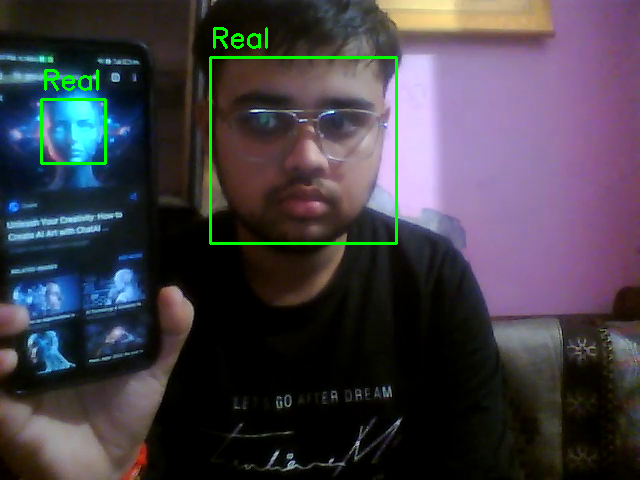

In [ ]:
# Google Colab setup
!pip install opencv-python scikit-image tensorflow

import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Function to detect faces in a frame
def detect_faces(frame, face_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

# Function to extract texture using LBP
def extract_lbp_face(face):
    gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_face, 24, 8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 27), range=(0, 26))
    hist = hist.astype("float")
    hist /= hist.sum() + 1e-7
    return hist

# Function to classify face as real or fake based on LBP histogram
def classify_face(face):
    lbp_hist = extract_lbp_face(face)
    # Dummy thresholding method based on histogram sum
    # You can replace this with a trained classifier
    return "Real" if np.sum(lbp_hist) > 0.4 else "Fake"

# Function to process the video and mark real and fake faces
def process_video(video_path):
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Capture video
    cap = cv2.VideoCapture(video_path)
    final_frame = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces in the frame
        faces = detect_faces(frame, face_cascade)

        if len(faces) > 0:
            for (x, y, w, h) in faces:
                face = frame[y:y+h, x:x+w]
                classification = classify_face(face)
                color = (0, 255, 0) if classification == "Real" else (0, 0, 255)
                cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
                cv2.putText(frame, classification, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Update the final frame with the last processed frame
        final_frame = frame

    cap.release()
    cv2.destroyAllWindows()

    # Return the final frame
    return final_frame

# Example usage
video_path = '/content/WIN_20240826_14_37_23_Pro.mp4'
final_frame = process_video(video_path)

# Display the final frame
if final_frame is not None:
    cv2_imshow(final_frame)
else:
    print("No frames were processed.")


# video model that will work

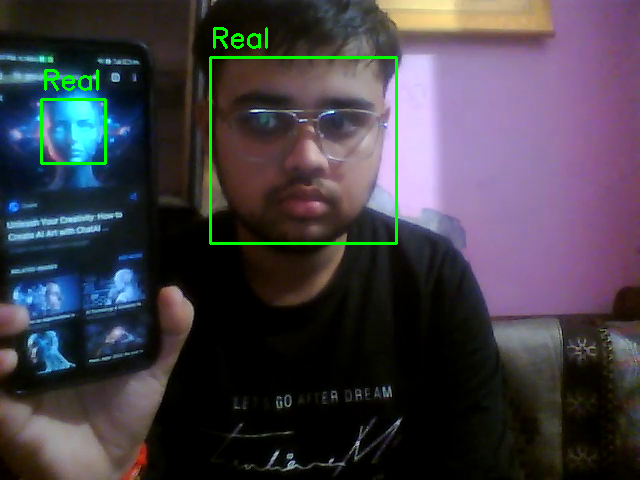

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from google.colab.patches import cv2_imshow

# Function to detect faces in a frame
def detect_faces(frame, face_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

# Function to extract texture using LBP
def extract_lbp_face(face):
    gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_face, 24, 8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 27), range=(0, 26))
    hist = hist.astype("float")
    hist /= hist.sum() + 1e-7
    return hist

# Function to classify face as real or fake based on LBP histogram
def classify_face(face, frame):
    lbp_hist = extract_lbp_face(face)
    lbp_score = np.sum(lbp_hist)

    # Apply a screen detection filter here (simplified example)
    screen_detected = detect_screen_near_face(face, frame)

    # Consider it fake if a screen is detected nearby, regardless of the LBP score
    if screen_detected:
        return "Fake"
    else:
        return "Real" if lbp_score > 0.4 else "Fake"

# Dummy function for screen detection (this needs a real implementation)
def detect_screen_near_face(face, frame):
    # This is where you'd implement logic to detect screens or reflective surfaces.
    # For now, it's just a placeholder that always returns False.
    return False

# Function to process the video and mark real and fake faces
def process_video(video_path):
    # Load the face cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Capture video
    cap = cv2.VideoCapture(video_path)
    final_frame = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces in the frame
        faces = detect_faces(frame, face_cascade)

        if len(faces) > 0:
            for (x, y, w, h) in faces:
                face = frame[y:y+h, x:x+w]
                classification = classify_face(face, frame)
                color = (0, 255, 0) if classification == "Real" else (0, 0, 255)
                cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
                cv2.putText(frame, classification, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Update the final frame with the last processed frame
        final_frame = frame

    cap.release()
    cv2.destroyAllWindows()

    # Return the final frame
    return final_frame

# Example usage
video_path = '/content/WIN_20240826_14_37_23_Pro.mp4'
final_frame = process_video(video_path)

# Display the final frame
if final_frame is not None:
    cv2_imshow(final_frame)
else:
    print("No frames were processed.")
